In [1]:
import pandas
dataset = pandas.read_csv('/Users/chenzy/Documents/spring quarter/tim245/project/imdb_cluster.csv', sep=',')
dataset = dataset.dropna()
dataset = dataset.reset_index(drop=True)

dataset = pandas.get_dummies(dataset)
dataset.head(10)

,num_critic_for_reviews,duration,Animation,Mystery,Sport,Western,Music,Biography,Sci-Fi,Documentary,...,language_English,language_French,language_German,language_Mandarin,language_Spanish,content_rating_G,content_rating_PG,content_rating_PG-13,content_rating_R,content_rating_Unrated
0,0.569231,0.194444,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0.215385,0.277778,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
2,0.066667,0.316667,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
3,0.289744,0.322222,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0.305128,0.266667,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
5,0.387179,0.388889,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
6,0.510256,0.288889,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
7,0.489744,0.288889,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
8,0.161538,0.394444,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
9,0.171795,0.283333,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0


[t-SNE] Computing pairwise distances...
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 2307
[t-SNE] Computed conditional probabilities for sample 2000 / 2307
[t-SNE] Computed conditional probabilities for sample 2307 / 2307
[t-SNE] Mean sigma: 0.721312
[t-SNE] KL divergence after 100 iterations with early exaggeration: 0.879276
[t-SNE] Error after 350 iterations: 0.879276


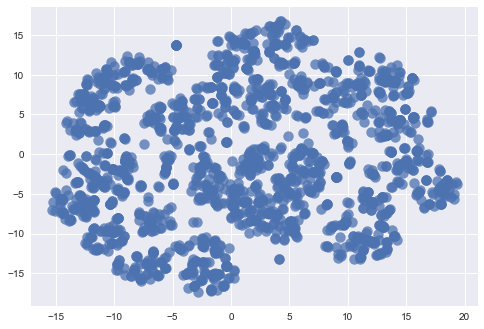

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

#create the TSNE representation
tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=500)
dataset_tsne = tsne.fit_transform(dataset)

#get the values for the two dimensional representation (x,y) for each instance in the dataset
tsne_x =  dataset_tsne [:,0]
tsne_y = dataset_tsne [:,1]

#plot the data
scatter = plt.scatter(tsne_x, tsne_y, alpha = .75,s = 100)
plt.show()

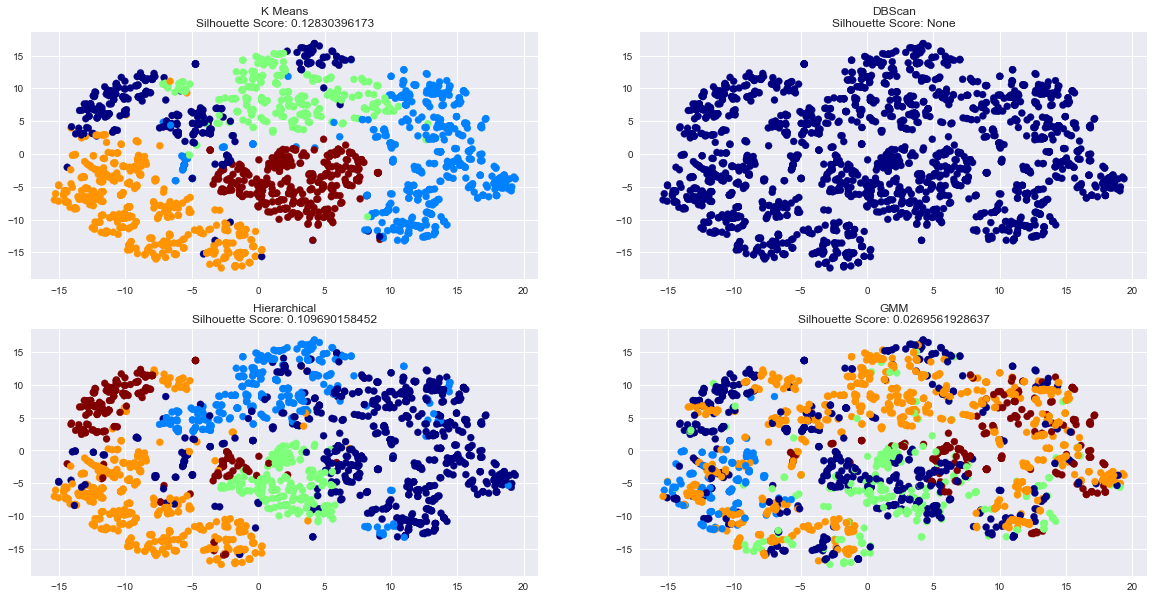

In [3]:
from sklearn import cluster
from matplotlib import pyplot
from sklearn import mixture
from sklearn.cluster import AgglomerativeClustering
import numpy as np
from sklearn import metrics
plt.rcParams['image.cmap'] = 'jet'

#k is the number of clusters and epsilon is radius in db-scan
k = 5
epsilon = 5
distance_metric = 'euclidean'

#create the clustering models
kmeans = cluster.KMeans(n_clusters=k)
dbscan = cluster.DBSCAN(eps= epsilon)
hierarchical = cluster.AgglomerativeClustering(n_clusters=k, affinity=distance_metric, linkage='ward')
gaussian_mm = mixture.GaussianMixture(n_components=k)

#fit the models to the dataset
kmeans.fit(dataset)
dbscan.fit(dataset)
hierarchical.fit(dataset)
gaussian_mm.fit(dataset)

#get the cluster labels for each instance
kmeans_labels = kmeans.labels_
dbscan_labels = dbscan.labels_
hierarchical_labels = hierarchical.labels_
gaussian_mm_labels = gaussian_mm.predict(dataset)

#compute the silhouette score for each clustering
kmeans_silhouette_score = metrics.silhouette_score(dataset, kmeans_labels, metric=distance_metric)

#must have more than 1 cluster to compute the silhouette_score for dbscan
noise_index = np.argwhere(dbscan_labels==-1)
if(np.unique(np.delete(dbscan_labels,noise_index)).size > 1):
    dbscan_silhouette_score = metrics.silhouette_score(dataset, dbscan_labels, metric=distance_metric)
else:
    dbscan_silhouette_score = None
    
hierarchical_silhouette_score = metrics.silhouette_score(dataset, hierarchical_labels, metric=distance_metric)
gaussian_mm_silhouette_score = metrics.silhouette_score(dataset, gaussian_mm_labels, metric=distance_metric)


#plot the results using the T-SNE representation
plt.figure(figsize=(20, 10))
plt.subplot(2,2,1)
plt.scatter(tsne_x, tsne_y, c= kmeans_labels)
plt.title('K Means'  + "\n" + 'Silhouette Score: ' + str(kmeans_silhouette_score))
plt.subplot(2,2,2)
plt.scatter(tsne_x, tsne_y, c= dbscan_labels)
plt.title('DBScan'  + "\n" + 'Silhouette Score: ' + str(dbscan_silhouette_score))
plt.subplot(2,2,3)
plt.scatter(tsne_x, tsne_y, c= hierarchical_labels)
plt.title('Hierarchical'  + "\n" + 'Silhouette Score: ' + str(hierarchical_silhouette_score))
plt.subplot(2,2,4)
plt.scatter(tsne_x, tsne_y, c= gaussian_mm_labels)
plt.title('GMM'  + "\n" + 'Silhouette Score: ' + str(gaussian_mm_silhouette_score))
plt.show()

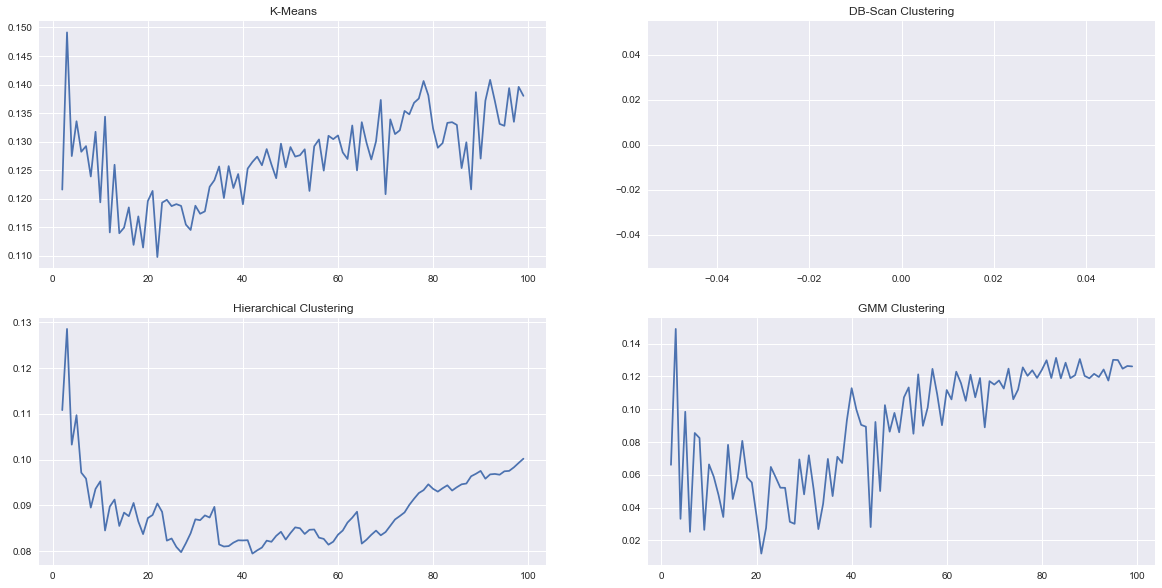

In [4]:
from sklearn import cluster
from matplotlib import pyplot
from sklearn import mixture
from sklearn.cluster import AgglomerativeClustering
import numpy as np
from sklearn import metrics
plt.rcParams['image.cmap'] = 'jet'

#scores for the parameters
kmeans_silhouette_scores = []
dbscan_silhouette_scores = []
hierarchical_silhouette_scores = []
gaussian_mm_silhouette_scores = []

distance_metric = 'euclidean'

#loop through different values for k and compute the silhouette score
for k in range(2,200,2):
    kmeans = cluster.KMeans(n_clusters=k)
    kmeans.fit(dataset)
    kmeans_labels = kmeans.labels_
    kmeans_silhouette_score = metrics.silhouette_score(dataset, kmeans_labels, metric=distance_metric)
    kmeans_silhouette_scores.append(kmeans_silhouette_score)

#loop through different values for epsilon and compute the silhouette score
for epsilon in range(2,200,2):
    dbscan = cluster.DBSCAN(eps=epsilon)
    dbscan.fit(dataset)
    dbscan_labels = dbscan.labels_
    #must have more than 1 cluster to compute the silhouette_score
    noise_index = np.argwhere(dbscan_labels==-1)
    if(np.unique(np.delete(dbscan_labels,noise_index)).size > 1):
        dbscan_silhouette_score = metrics.silhouette_score(dataset, dbscan_labels, metric=distance_metric)
        #dbscan_silhouette_scores.append(dbscan_silhouette_score)
    else:
        dbscan_silhouette_score = None
        #dbscan_silhouette_scores.append(0)
    dbscan_silhouette_scores.append(dbscan_silhouette_score)
    
#loop through different values for k and compute the silhouette score
for k in range(2,200,2):
    hierarchical = cluster.AgglomerativeClustering(n_clusters=k, affinity=distance_metric, linkage='ward')
    hierarchical.fit(dataset)
    hierarchical_labels = hierarchical.labels_
    hierarchical_silhouette_score = metrics.silhouette_score(dataset, hierarchical_labels, metric=distance_metric)
    hierarchical_silhouette_scores.append(hierarchical_silhouette_score)
    
#loop through different values for k and compute the silhouette score
for k in range(2,200,2):
    gaussian_mm = mixture.GaussianMixture(n_components=k)
    gaussian_mm.fit(dataset)
    gaussian_mm_labels = gaussian_mm.predict(dataset)
    gaussian_mm_silhouette_score = metrics.silhouette_score(dataset, gaussian_mm_labels, metric=distance_metric)
    gaussian_mm_silhouette_scores.append(gaussian_mm_silhouette_score)
    
#plot silhouette score as function of k and epsilon
plt.figure(figsize=(20, 10))
plt.subplot(2,2,1)
plt.plot(range(2,200,2),kmeans_silhouette_scores)
plt.title('K-Means')
plt.subplot(2,2,2)
plt.plot(range(2,200,2),dbscan_silhouette_scores)
plt.title('DB-Scan Clustering')
plt.subplot(2,2,3)
plt.plot(range(2,200,2),hierarchical_silhouette_scores)
plt.title('Hierarchical Clustering')
plt.subplot(2,2,4)
plt.plot(range(2,200,2),gaussian_mm_silhouette_scores)
plt.title('GMM Clustering')
plt.show()

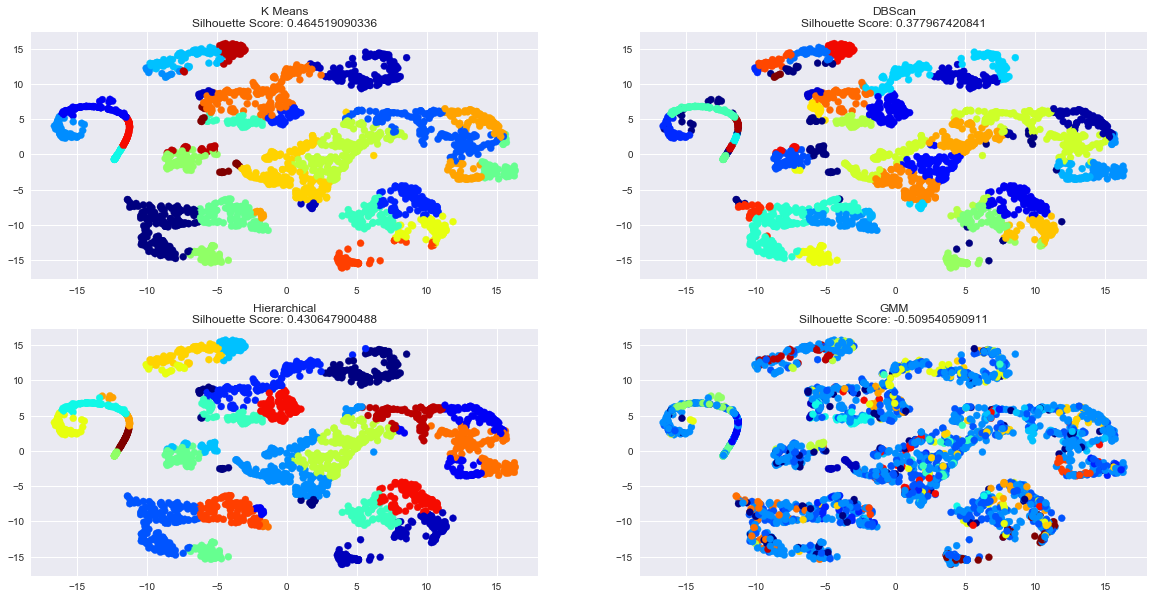

In [49]:
from sklearn import cluster
from matplotlib import pyplot
from sklearn import mixture
from sklearn.cluster import AgglomerativeClustering
import numpy as np
from sklearn import metrics
plt.rcParams['image.cmap'] = 'jet'

kmeans_silhouette_scores = []
dbscan_silhouette_scores = []
hierarchical_silhouette_scores = []
gaussian_mm_silhouette_scores = []

#k is the number of clusters and epsilon is radius in db-scan
k = 5
epsilon = 5
distance_metric = 'euclidean'

#create the clustering models
kmeans = cluster.KMeans(n_clusters=20)
dbscan = cluster.DBSCAN(eps= 8)
hierarchical = cluster.AgglomerativeClustering(n_clusters=20, affinity=distance_metric, linkage='ward')
gaussian_mm = mixture.GaussianMixture(n_components=20)

#fit the models to the dataset
kmeans.fit(dataset)
dbscan.fit(dataset)
hierarchical.fit(dataset)
gaussian_mm.fit(dataset)

#get the cluster labels for each instance
kmeans_labels = kmeans.labels_
dbscan_labels = dbscan.labels_
hierarchical_labels = hierarchical.labels_
gaussian_mm_labels = gaussian_mm.predict(dataset)

#compute the silhouette score for each clustering
kmeans_silhouette_score = metrics.silhouette_score(dataset, kmeans_labels, metric=distance_metric)

#must have more than 1 cluster to compute the silhouette_score for dbscan
noise_index = np.argwhere(dbscan_labels==-1)
if(np.unique(np.delete(dbscan_labels,noise_index)).size > 1):
    dbscan_silhouette_score = metrics.silhouette_score(dataset, dbscan_labels, metric=distance_metric)
else:
    dbscan_silhouette_score = None
    
hierarchical_silhouette_score = metrics.silhouette_score(dataset, hierarchical_labels, metric=distance_metric)
gaussian_mm_silhouette_score = metrics.silhouette_score(dataset, gaussian_mm_labels, metric=distance_metric)


#plot the results using the T-SNE representation
plt.figure(figsize=(20, 10))
plt.subplot(2,2,1)
plt.scatter(tsne_x, tsne_y, c= kmeans_labels)
plt.title('K Means'  + "\n" + 'Silhouette Score: ' + str(kmeans_silhouette_score))
plt.subplot(2,2,2)
plt.scatter(tsne_x, tsne_y, c= dbscan_labels)
plt.title('DBScan'  + "\n" + 'Silhouette Score: ' + str(dbscan_silhouette_score))
plt.subplot(2,2,3)
plt.scatter(tsne_x, tsne_y, c= hierarchical_labels)
plt.title('Hierarchical'  + "\n" + 'Silhouette Score: ' + str(hierarchical_silhouette_score))
plt.subplot(2,2,4)
plt.scatter(tsne_x, tsne_y, c= gaussian_mm_labels)
plt.title('GMM'  + "\n" + 'Silhouette Score: ' + str(gaussian_mm_silhouette_score))
plt.show()

In [37]:
1

1

In [20]:
dataset.head(3)

,num_critic_for_reviews,duration,Animation,Mystery,Sport,Western,Music,Biography,Sci-Fi,Documentary,...,language_English,language_French,language_German,language_Mandarin,language_Spanish,content_rating_G,content_rating_PG,content_rating_PG-13,content_rating_R,content_rating_Unrated
0,0.569231,0.369565,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0.215385,0.434783,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
2,0.066667,0.465217,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0


In [51]:
#k is the number of clusters and epsilon is radius in db-scan
distance_metric = 'euclidean'

#create the clustering models
kmeans = cluster.KMeans(n_clusters=20)
dbscan = cluster.DBSCAN(eps= 8)
hierarchical = cluster.AgglomerativeClustering(n_clusters=20, affinity=distance_metric, linkage='ward')
gaussian_mm = mixture.GaussianMixture(n_components=20)

#fit the models to the dataset
kmeans.fit(dataset)
dbscan.fit(dataset)
hierarchical.fit(dataset)
gaussian_mm.fit(dataset)

#get the cluster labels for each instance
kmeans_labels = kmeans.labels_
dbscan_labels = dbscan.labels_
hierarchical_labels = hierarchical.labels_
gaussian_mm_labels = gaussian_mm.predict(dataset)
#get the labels from the selected algorithm, e.g. kmeans
selected_labels = kmeans_labels

#add the labels to the dataset
labeled_dataset = dataset
labeled_dataset['cluster_label'] = pandas.Series(selected_labels)
labeled_dataset.to_csv('labeled.csv')


In [30]:
zip(range(2,100,1),kmeans_silhouette_scores)

[(2, 0.60286770195870187),
 (3, 0.55040329909664731),
 (4, 0.51656827198577804),
 (5, 0.49639533300159183),
 (6, 0.48463874478416163),
 (7, 0.48651617837147643),
 (8, 0.47380951565086188),
 (9, 0.45471528740032402),
 (10, 0.42894742012540976),
 (11, 0.42043272169435969),
 (12, 0.41397124079907716),
 (13, 0.40817832790361219),
 (14, 0.38879347683855409),
 (15, 0.38574769268036041),
 (16, 0.37784515930840579),
 (17, 0.38702145911031854),
 (18, 0.37229677110958498),
 (19, 0.36262013899825796),
 (20, 0.35492609335477815),
 (21, 0.34453760461925487),
 (22, 0.35775297510734339),
 (23, 0.34976968872346154),
 (24, 0.35045776320767202),
 (25, 0.35647921188623799),
 (26, 0.35112418095830888),
 (27, 0.34853339820108764),
 (28, 0.35181259358070266),
 (29, 0.34269596855153345),
 (30, 0.34768968462035515),
 (31, 0.33996981544917998),
 (32, 0.3426295046701629),
 (33, 0.33560690756644912),
 (34, 0.33304235971006685),
 (35, 0.34152806934132018),
 (36, 0.33768700860549067),
 (37, 0.33734578166159301),
 